## Evaluation of lane detection

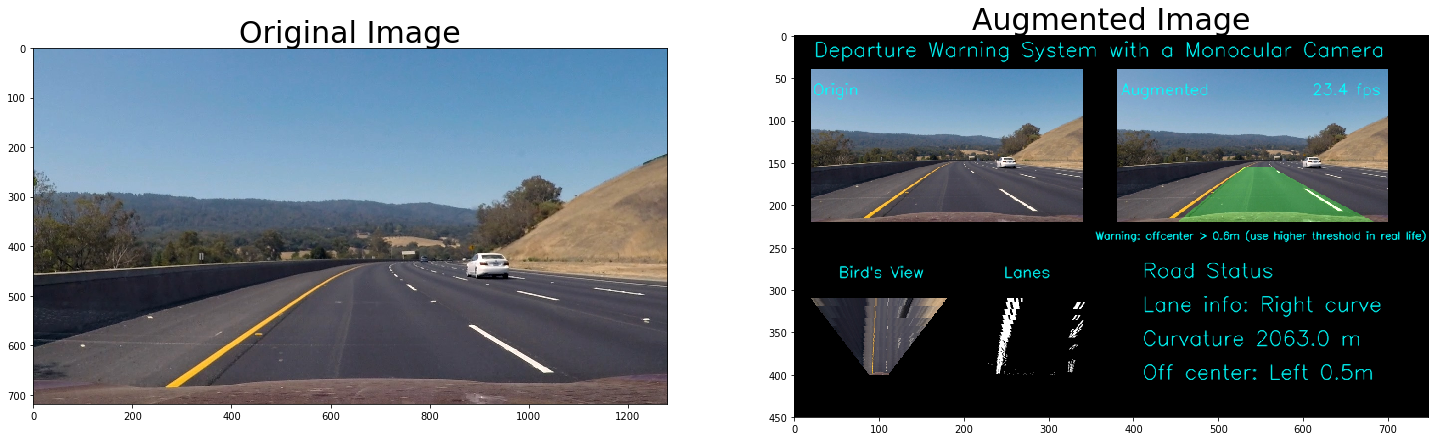

In [20]:
"""Main.ipynb: Evaluation of lane detection""" 

import import_ipynb
from lane_finding import process_frame
import matplotlib.pyplot as plt
import cv2

imagepath = 'test_images/test3.jpg'
img = cv2.imread(imagepath)
img_aug = process_frame(img)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 9))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
img_aug = cv2.cvtColor(img_aug, cv2.COLOR_BGR2RGB)
ax2.imshow(img_aug)
ax2.set_title('Augmented Image', fontsize=30)
plt.show()

In [11]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Project_output = 'Test_Video/project_video_Optimized.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip1 = VideoFileClip("Test_Video/project_video.mp4").subclip(0,1)
clip1 = VideoFileClip("Test_Video/project_video.mp4")
Project_clip = clip1.fl_image(process_frame) #NOTE: it should be in BGR format
%time Project_clip.write_videofile(Project_output, audio=False)

[MoviePy] >>>> Building video Test_Video/project_video_Optimized.mp4
[MoviePy] Writing video Test_Video/project_video_Optimized.mp4


100%|█████████▉| 1260/1261 [01:02<00:00, 20.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Test_Video/project_video_Optimized.mp4 

CPU times: user 1min 12s, sys: 11.5 s, total: 1min 23s
Wall time: 1min 3s


In [12]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(Project_output))

## Yolo Classifier

In [3]:
"""Main.ipynb:Yolo classifier""" 

import import_ipynb
import matplotlib.image as mpimg
from yolo_pipeline import *
from lane_process import lane_process
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def pipeline_yolo(img):

    img_undist, img_lane_augmented, lane_info = lane_process(img)
    output = vehicle_detection_yolo(img_undist, img_lane_augmented, lane_info)

    return output

def pipeline_svm(img):

    img_undist, img_lane_augmented, lane_info = lane_process(img)
    output = vehicle_detection_svm(img_undist, img_lane_augmented, lane_info)

    return output

Text(0.5,1,'yolo pipeline')

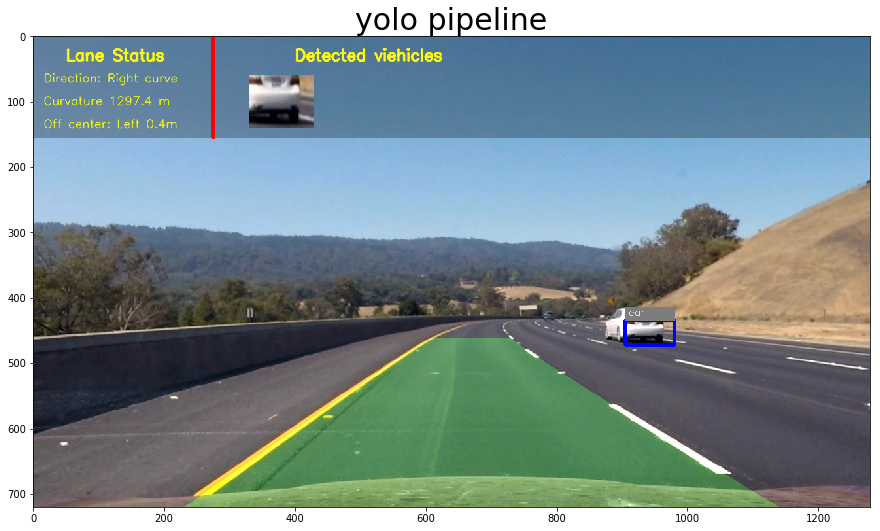

In [6]:
filename = 'test_images/test3.jpg'
image = mpimg.imread(filename)

# Yolo pipeline
yolo_result = pipeline_yolo(image)
plt.figure(figsize=(15,15))
plt.imshow(yolo_result)
plt.title('yolo pipeline', fontsize=30)

In [7]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Project_output = 'Test_Video/project_video_Yolo.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip1 = VideoFileClip("Test_Video/project_video.mp4").subclip(0,1)
clip1 = VideoFileClip("Test_Video/project_video.mp4")
Project_clip = clip1.fl_image(pipeline_yolo) #NOTE: it should be in BGR format
%time Project_clip.write_videofile(Project_output, audio=False)

[MoviePy] >>>> Building video Test_Video/project_video_Yolo.mp4
[MoviePy] Writing video Test_Video/project_video_Yolo.mp4


100%|█████████▉| 1260/1261 [23:07<00:01,  1.16s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Test_Video/project_video_Yolo.mp4 

CPU times: user 1h 4min 5s, sys: 4min 28s, total: 1h 8min 33s
Wall time: 23min 9s


In [8]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(Project_output))